# Changing Basis — Coordinate Systems, Projections, and Vector Representations

In this notebook, we explore how to change the **basis** in which a vector is represented. We'll look at:
- What a basis is and why it matters
- Why changing basis is useful in mathematics and machine learning
- How to do it using **dot products** and projections
- When this works (orthogonal vs non-orthogonal cases)
- Practical numerical examples and visualizations

## 1. What is a Basis?

A **basis** is a set of linearly independent vectors that span the entire vector space. Any vector in that space can be written as a unique **linear combination** of these basis vectors.

### Standard Basis in 2D:
The standard basis vectors in 2D are:
- $\vec{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ (unit vector along x-axis)
- $\vec{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ (unit vector along y-axis)

Any vector $\vec{v} = \begin{bmatrix} a \\ b \end{bmatrix}$ can be written as: $\vec{v} = a\vec{e}_1 + b\vec{e}_2$

### Alternative Basis:
We can also define new basis vectors, such as:
- $\vec{b}_1 = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$
- $\vec{b}_2 = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$

The key question is: **How do we express a vector in this new coordinate system?**

Let's explore how to express a vector in a new basis using **projections**.


In [3]:
# Import necessary libraries for vector operations and plotting
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Define standard basis vectors (for reference)
e1 = np.array([1, 0])  # Standard basis vector along x-axis
e2 = np.array([0, 1])  # Standard basis vector along y-axis
print(f"Standard basis vectors:")
print(f"  e₁ = {e1}")
print(f"  e₂ = {e2}")

# Define a vector r in standard basis coordinates
r = np.array([3, 4])   # This means r = 3*e1 + 4*e2
print(f"\nVector r in standard coordinates: {r}")
print(f"  Meaning: r = {r[0]}*e₁ + {r[1]}*e₂")


Standard basis vectors:
  e₁ = [1 0]
  e₂ = [0 1]

Vector r in standard coordinates: [3 4]
  Meaning: r = 3*e₁ + 4*e₂


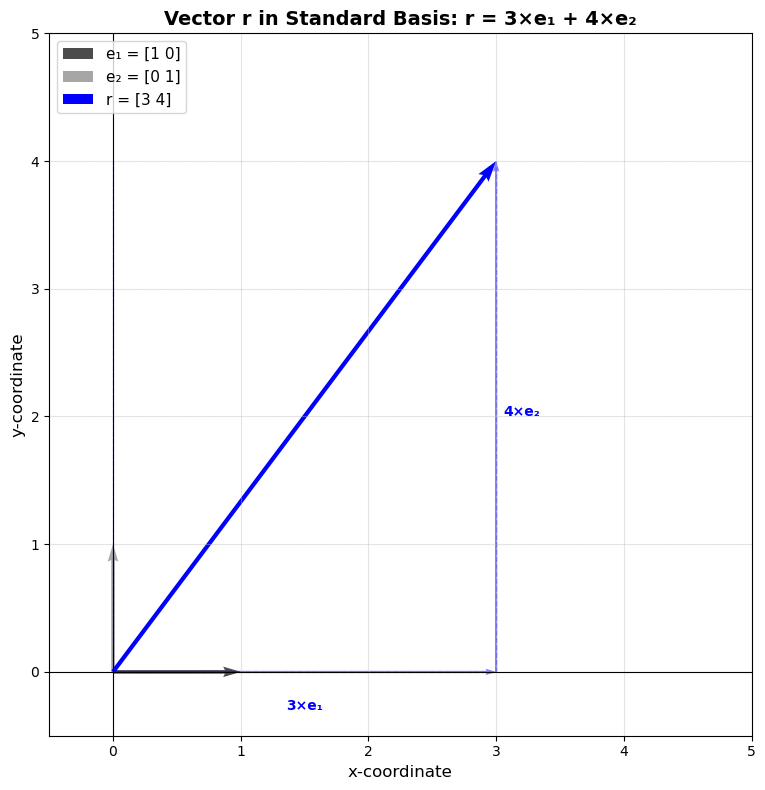

Vector r in standard basis:
  r = 3×e₁ + 4×e₂
  r = 3×[1,0] + 4×[0,1]
  r = [3, 4]


In [11]:
# Create a visualization showing vector r in standard basis
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot the standard basis vectors
ax.quiver(0, 0, e1[0], e1[1], color='black', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f'e₁ = {e1}', linewidth=1.5, alpha=0.7)

ax.quiver(0, 0, e2[0], e2[1], color='gray', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f'e₂ = {e2}', linewidth=1.5, alpha=0.7)

# Plot the vector r
ax.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
          width=0.006, label=f'r = {r}', linewidth=2)

# Show the decomposition of r in standard basis
# Component along e1 (x-direction)
ax.quiver(0, 0, r[0], 0, color='blue', angles='xy', scale_units='xy', scale=1, 
          width=0.003, alpha=0.5, linewidth=1)

# Component along e2 (y-direction)  
ax.quiver(r[0], 0, 0, r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
          width=0.003, alpha=0.5, linewidth=1)

# Draw dashed lines to show the decomposition
ax.plot([0, r[0]], [0, 0], 'b--', alpha=0.3, linewidth=1)
ax.plot([r[0], r[0]], [0, r[1]], 'b--', alpha=0.3, linewidth=1)
ax.plot([0, 0], [0, r[1]], 'b--', alpha=0.3, linewidth=1)

# Add text annotations
ax.text(r[0]/2, -0.3, f'{r[0]}×e₁', fontsize=10, color='blue', ha='center', fontweight='bold')
ax.text(r[0]+0.2, r[1]/2, f'{r[1]}×e₂', fontsize=10, color='blue', ha='center', fontweight='bold')

# Draw standard coordinate grid
for i in range(1, 6):
    ax.axhline(i, color='lightgray', linestyle=':', alpha=0.5, linewidth=0.5)
    ax.axvline(i, color='lightgray', linestyle=':', alpha=0.5, linewidth=0.5)

# Set plot properties
ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.5, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.legend(fontsize=11, loc='upper left')
plt.title("Vector r in Standard Basis: r = 3×e₁ + 4×e₂", fontsize=14, fontweight='bold')
plt.xlabel('x-coordinate', fontsize=12)
plt.ylabel('y-coordinate', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Vector r in standard basis:")
print(f"  r = {r[0]}×e₁ + {r[1]}×e₂")
print(f"  r = {r[0]}×[1,0] + {r[1]}×[0,1]")
print(f"  r = [{r[0]}, {r[1]}]")

In [12]:
# Define new orthogonal basis vectors
# These vectors are orthogonal: b1 · b2 = 2*(-1) + 1*2 = 0
b1 = np.array([2, 1])   # First new basis vector
b2 = np.array([-1, 2])  # Second new basis vector (orthogonal to b1)

print(f"\nNew basis vectors:")
print(f"  b₁ = {b1}")
print(f"  b₂ = {b2}")

# Verify orthogonality (crucial for our projection method)
dot_product = np.dot(b1, b2)
print(f"\nOrthogonality check:")
print(f"  b₁ · b₂ = {b1[0]}×{b2[0]} + {b1[1]}×{b2[1]} = {dot_product}")
print(f"  Are b₁ and b₂ orthogonal? {'✓ Yes' if dot_product == 0 else '✗ No'}")


New basis vectors:
  b₁ = [2 1]
  b₂ = [-1  2]

Orthogonality check:
  b₁ · b₂ = 2×-1 + 1×2 = 0
  Are b₁ and b₂ orthogonal? ✓ Yes


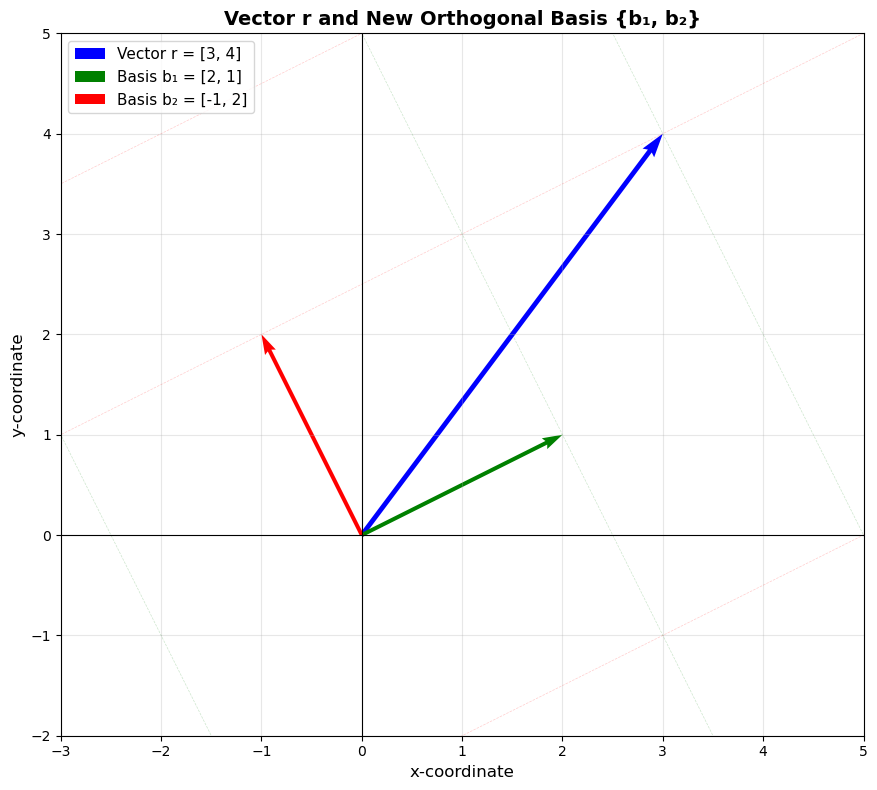


Next: We'll find how to express r in the new basis (array([2, 1]), array([-1,  2]))
Goal: Find coefficients c₁, c₂ such that r = c₁ . b₁ + c₂ . b₂


In [13]:
# Create visualization showing the vector and new basis
plt.figure(figsize=(10, 8))
ax = plt.gca()


# Plot the original vector r
ax.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
          width=0.006, label=f'Vector r = [{r[0]}, {r[1]}]', linewidth=2)

# Plot the new basis vectors
ax.quiver(0, 0, b1[0], b1[1], color='green', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f'Basis b₁ = [{b1[0]}, {b1[1]}]', linewidth=1.5)

ax.quiver(0, 0, b2[0], b2[1], color='red', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f'Basis b₂ = [{b2[0]}, {b2[1]}]', linewidth=1.5)

# Draw grid lines along new basis directions for visual aid
for i in range(-2, 4):
    if i != 0:
        # Grid lines parallel to b1 direction
        ax.plot([i*b1[0]-3*b2[0], i*b1[0]+3*b2[0]], 
                [i*b1[1]-3*b2[1], i*b1[1]+3*b2[1]], 
                'g--', alpha=0.2, linewidth=0.5)
        # Grid lines parallel to b2 direction
        ax.plot([i*b2[0]-3*b1[0], i*b2[0]+3*b1[0]], 
                [i*b2[1]-3*b1[1], i*b2[1]+3*b1[1]], 
                'r--', alpha=0.2, linewidth=0.5)

# Set plot properties
ax.set_xlim(-3, 5)
ax.set_ylim(-2, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.legend(fontsize=11, loc='upper left')
plt.title("Vector r and New Orthogonal Basis {b₁, b₂}", fontsize=14, fontweight='bold')
plt.xlabel('x-coordinate', fontsize=12)
plt.ylabel('y-coordinate', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nNext: We'll find how to express r in the new basis {b1, b2}")
print(f"Goal: Find coefficients c₁, c₂ such that r = c₁ . b₁ + c₂ . b₂")

## 2. Finding Coordinates in the New Basis

### Step-by-Step: Why Projections Work for Orthogonal Bases

Let's understand this process step by step with a simple analogy and clear mathematics.

#### 🎯 The Goal
We want to express vector $\vec{r}$ in terms of our new basis vectors $\vec{b}_1$ and $\vec{b}_2$:
$$\vec{r} = c_1 \vec{b}_1 + c_2 \vec{b}_2$$

We need to find the coefficients $c_1$ and $c_2$.

#### 🔑 Key Insight: The "Shadow" Method

Think of projections as **shadows**:
- When you shine light perpendicular to $\vec{b}_1$, vector $\vec{r}$ casts a shadow along $\vec{b}_1$
- The length of this shadow tells us how much of $\vec{b}_1$ we need
- The same applies for $\vec{b}_2$

#### 📐 The Mathematics (Step by Step)

**Step 1:** Start with our equation
$$\vec{r} = c_1 \vec{b}_1 + c_2 \vec{b}_2$$

**Step 2:** Take the dot product of both sides with $\vec{b}_1$
$$\vec{r} \cdot \vec{b}_1 = (c_1 \vec{b}_1 + c_2 \vec{b}_2) \cdot \vec{b}_1$$

**Step 3:** Use the distributive property
$$\vec{r} \cdot \vec{b}_1 = c_1 (\vec{b}_1 \cdot \vec{b}_1) + c_2 (\vec{b}_2 \cdot \vec{b}_1)$$

**Step 4:** Here's where orthogonality helps! Since $\vec{b}_1 \perp \vec{b}_2$:
$$\vec{b}_2 \cdot \vec{b}_1 = 0$$

**Step 5:** So our equation simplifies to:
$$\vec{r} \cdot \vec{b}_1 = c_1 (\vec{b}_1 \cdot \vec{b}_1)$$

**Step 6:** Solve for $c_1$:
$$c_1 = \frac{\vec{r} \cdot \vec{b}_1}{\vec{b}_1 \cdot \vec{b}_1} = \frac{\vec{r} \cdot \vec{b}_1}{\|\vec{b}_1\|^2}$$

#### 🧮 The Projection Formula

For any orthogonal basis vector $\vec{b}_i$:

$$\boxed{c_i = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2}}$$

This formula gives us the **coefficient** (how many times we need $\vec{b}_i$).

#### 📏 From Coefficients to Vector Projections

Once we have the coefficient $c_i$, we can find the actual vector projection:

$$\text{proj}_{\vec{b}_i}(\vec{r}) = c_i \vec{b}_i$$

#### 🔄 Reconstruction

Finally, we can reconstruct the original vector:

$$\vec{r} = \text{proj}_{\vec{b}_1}(\vec{r}) + \text{proj}_{\vec{b}_2}(\vec{r}) = c_1 \vec{b}_1 + c_2 \vec{b}_2$$

#### ⚠️ Important Note

This simple projection method **only works when basis vectors are orthogonal**. If they're not orthogonal, the $\vec{b}_2 \cdot \vec{b}_1 = 0$ step fails, and we need more sophisticated matrix methods.

---

**Next:** Let's see this in action with our specific vectors!


In [17]:
import numpy as np

# Given vectors r, b1, b2
r = np.array([3, 5])
b1 = np.array([1, 2])
b2 = np.array([4, 6])

# Compute the coefficients in the new basis using projections
print("=== Computing Basis Change Using Projections ===")

# Step 1: Calculate the projection coefficients
print("\nStep 1: Calculate projection coefficients")
print(f"c₁ = (r · b₁) / (b₁ · b₁)")

# Calculate dot products step by step for clarity
r_dot_b1 = np.dot(r, b1)
b1_dot_b1 = np.dot(b1, b1)
c1 = r_dot_b1 / b1_dot_b1

print(f"   r · b₁ = {r}·{b1} = {r[0]}×{b1[0]} + {r[1]}×{b1[1]} = {r_dot_b1}")
print(f"   b₁ · b₁ = {b1}·{b1} = {b1[0]}×{b1[0]} + {b1[1]}×{b1[1]} = {b1_dot_b1}")
print(f"   c₁ = {r_dot_b1}/{b1_dot_b1} = {c1:.3f}")

print(f"\nc₂ = (r · b₂) / (b₂ · b₂)")

r_dot_b2 = np.dot(r, b2)
b2_dot_b2 = np.dot(b2, b2)
c2 = r_dot_b2 / b2_dot_b2

print(f"   r · b₂ = {r}·{b2} = {r[0]}×{b2[0]} + {r[1]}×{b2[1]} = {r_dot_b2}")
print(f"   b₂ · b₂ = {b2}·{b2} = {b2[0]}×{b2[0]} + {b2[1]}×{b2[1]} = {b2_dot_b2}")
print(f"   c₂ = {r_dot_b2}/{b2_dot_b2} = {c2:.3f}")

# Step 2: Calculate the vector projections
print(f"\nStep 2: Calculate vector projections")
proj_b1 = c1 * b1
proj_b2 = c2 * b2

print(f"proj_b₁(r) = c₁ × b₁ = {c1:.3f} × {b1} = {proj_b1}")
print(f"proj_b₂(r) = c₂ × b₂ = {c2:.3f} × {b2} = {proj_b2}")

# Step 3: Verify reconstruction
print(f"\nStep 3: Verify reconstruction")
r_reconstructed = proj_b1 + proj_b2
reconstruction_error = np.linalg.norm(r - r_reconstructed)

print(f"r_reconstructed = proj_b₁(r) + proj_b₂(r)")
print(f"                = {proj_b1} + {proj_b2}")
print(f"                = {r_reconstructed}")
print(f"Original r      = {r}")
print(f"Reconstruction error: {reconstruction_error:.10f}")

# Final result
print(f"\n🎯 RESULT:")
print(f"Vector r in standard basis: [{r[0]}, {r[1]}]")
print(f"Vector r in new basis {{{b1}, {b2}}}: [{c1:.3f}, {c2:.3f}]")
print(f"\nThis means: r = {c1:.3f} × b₁ + {c2:.3f} × b₂")


=== Computing Basis Change Using Projections ===

Step 1: Calculate projection coefficients
c₁ = (r · b₁) / (b₁ · b₁)
   r · b₁ = [3 5]·[1 2] = 3×1 + 5×2 = 13
   b₁ · b₁ = [1 2]·[1 2] = 1×1 + 2×2 = 5
   c₁ = 13/5 = 2.600

c₂ = (r · b₂) / (b₂ · b₂)
   r · b₂ = [3 5]·[4 6] = 3×4 + 5×6 = 42
   b₂ · b₂ = [4 6]·[4 6] = 4×4 + 6×6 = 52
   c₂ = 42/52 = 0.808

Step 2: Calculate vector projections
proj_b₁(r) = c₁ × b₁ = 2.600 × [1 2] = [2.6 5.2]
proj_b₂(r) = c₂ × b₂ = 0.808 × [4 6] = [3.23076923 4.84615385]

Step 3: Verify reconstruction
r_reconstructed = proj_b₁(r) + proj_b₂(r)
                = [2.6 5.2] + [3.23076923 4.84615385]
                = [ 5.83076923 10.04615385]
Original r      = [3 5]
Reconstruction error: 5.7859245654

🎯 RESULT:
Vector r in standard basis: [3, 5]
Vector r in new basis {[1 2], [4 6]}: [2.600, 0.808]

This means: r = 2.600 × b₁ + 0.808 × b₂


## 3. Visualizing the Projection Decomposition

Now let's create a visual representation of how $\vec{r}$ can be decomposed into projections onto the new basis vectors. This shows geometrically how:

$$\vec{r} = \text{proj}_{\vec{b}_1}(\vec{r}) + \text{proj}_{\vec{b}_2}(\vec{r})$$

The visualization will show:
- The original vector $\vec{r}$ (blue)
- Its projection onto $\vec{b}_1$ (green)
- Its projection onto $\vec{b}_2$ (red)  
- How these projections add up to reconstruct $\vec{r}$

### Understanding Vector Projections

The **scalar projection** of $\vec{r}$ onto $\vec{b}_i$ gives us the coefficient:
$$c_i = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2}$$

The **vector projection** is then:
$$\text{proj}_{\vec{b}_i}(\vec{r}) = c_i \vec{b}_i = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2} \vec{b}_i$$

These projections are the "shadows" of $\vec{r}$ cast onto the directions of each basis vector.


=== Vector Projections: Standard vs Orthogonal Basis ===


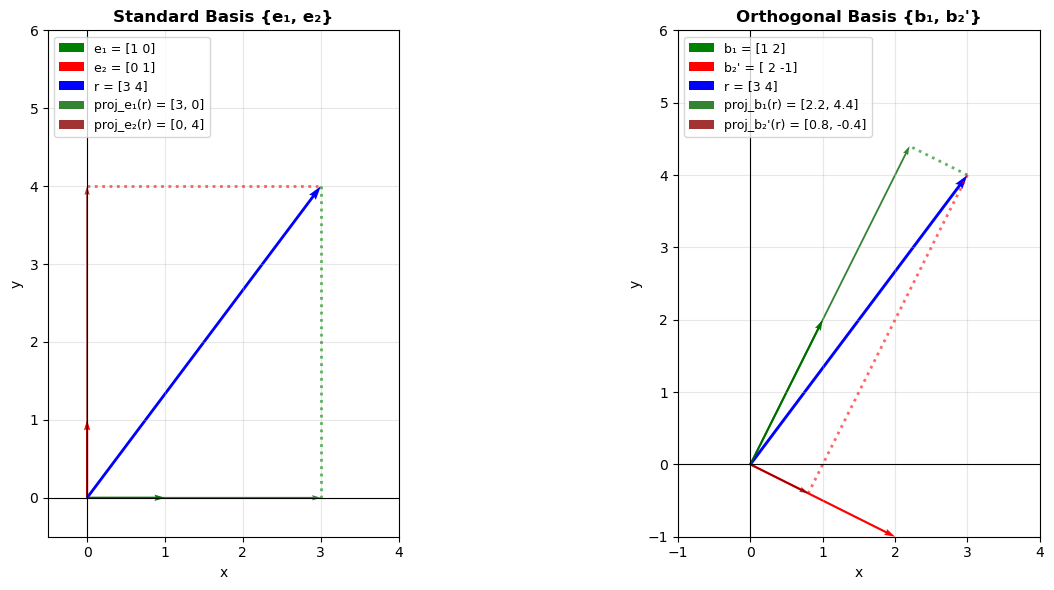


📊 Projection Comparison:
Vector r = [3 4]

Standard Basis:
  proj_e₁(r) = [3 0]
  proj_e₂(r) = [0 4]
  Sum = [3 4] = r ✓

Orthogonal Basis:
  proj_b₁(r) = [2.20, 4.40]
  proj_b₂'(r) = [0.80, -0.40]
  Sum = [3.00, 4.00] = r ✓

✨ In orthogonal bases, projections sum to the original vector!


In [19]:
r = np.array([3, 4])  # Original vector in standard basis

# Create a simple comparison of vector projections in different bases
print("=== Vector Projections: Standard vs Orthogonal Basis ===")

# Create two subplots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ===== LEFT PLOT: Standard Basis =====
ax1.set_title("Standard Basis {e₁, e₂}", fontsize=12, fontweight='bold')

# Draw standard basis vectors
ax1.quiver(0, 0, e1[0], e1[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'e₁ = {e1}', linewidth=2)
ax1.quiver(0, 0, e2[0], e2[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'e₂ = {e2}', linewidth=2)

# Draw original vector r
ax1.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.008, label=f'r = {r}', linewidth=3)

# Calculate projections onto standard basis
proj_e1 = np.dot(r, e1) * e1  # [3, 0]
proj_e2 = np.dot(r, e2) * e2  # [0, 5]

# Draw projections
ax1.quiver(0, 0, proj_e1[0], proj_e1[1], color='darkgreen', angles='xy', scale_units='xy', scale=1, 
           width=0.005, label=f'proj_e₁(r) = [{proj_e1[0]:.0f}, {proj_e1[1]:.0f}]', alpha=0.8)
ax1.quiver(0, 0, proj_e2[0], proj_e2[1], color='darkred', angles='xy', scale_units='xy', scale=1, 
           width=0.005, label=f'proj_e₂(r) = [{proj_e2[0]:.0f}, {proj_e2[1]:.0f}]', alpha=0.8)

# Draw dotted lines to show projections
ax1.plot([r[0], r[0]], [0, r[1]], 'g:', linewidth=2, alpha=0.6)
ax1.plot([0, r[0]], [r[1], r[1]], 'r:', linewidth=2, alpha=0.6)

ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 6)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.axvline(0, color='black', linewidth=0.8)
ax1.legend(fontsize=9, loc='upper left')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# ===== RIGHT PLOT: Orthogonal Basis =====
ax2.set_title("Orthogonal Basis {b₁, b₂'}", fontsize=12, fontweight='bold')

# Create an orthogonal basis using Gram-Schmidt
# b1 is already defined, create orthogonal b2_orth
b2_orth = np.array([2, -1])  # Simple orthogonal vector to b1

# Draw orthogonal basis vectors
ax2.quiver(0, 0, b1[0], b1[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'b₁ = {b1}', linewidth=2)
ax2.quiver(0, 0, b2_orth[0], b2_orth[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'b₂\' = {b2_orth}', linewidth=2)

# Draw original vector r
ax2.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.008, label=f'r = {r}', linewidth=3)

# Calculate projections onto orthogonal basis
proj_b1_orth = (np.dot(r, b1) / np.dot(b1, b1)) * b1
proj_b2_orth = (np.dot(r, b2_orth) / np.dot(b2_orth, b2_orth)) * b2_orth

# Draw projections
ax2.quiver(0, 0, proj_b1_orth[0], proj_b1_orth[1], color='darkgreen', angles='xy', scale_units='xy', scale=1, 
           width=0.005, label=f'proj_b₁(r) = [{proj_b1_orth[0]:.1f}, {proj_b1_orth[1]:.1f}]', alpha=0.8)
ax2.quiver(0, 0, proj_b2_orth[0], proj_b2_orth[1], color='darkred', angles='xy', scale_units='xy', scale=1, 
           width=0.005, label=f'proj_b₂\'(r) = [{proj_b2_orth[0]:.1f}, {proj_b2_orth[1]:.1f}]', alpha=0.8)

# Draw perpendicular lines to show projections
ax2.plot([r[0], proj_b1_orth[0]], [r[1], proj_b1_orth[1]], 'g:', linewidth=2, alpha=0.6)
ax2.plot([r[0], proj_b2_orth[0]], [r[1], proj_b2_orth[1]], 'r:', linewidth=2, alpha=0.6)

ax2.set_xlim(-1, 4)
ax2.set_ylim(-1, 6)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.axvline(0, color='black', linewidth=0.8)
ax2.legend(fontsize=9, loc='upper left')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

# Print comparison summary
print(f"\n📊 Projection Comparison:")
print(f"Vector r = {r}")
print(f"\nStandard Basis:")
print(f"  proj_e₁(r) = {proj_e1}")
print(f"  proj_e₂(r) = {proj_e2}")
print(f"  Sum = {proj_e1 + proj_e2} = r ✓")

print(f"\nOrthogonal Basis:")
print(f"  proj_b₁(r) = [{proj_b1_orth[0]:.2f}, {proj_b1_orth[1]:.2f}]")
print(f"  proj_b₂'(r) = [{proj_b2_orth[0]:.2f}, {proj_b2_orth[1]:.2f}]")
print(f"  Sum = [{(proj_b1_orth + proj_b2_orth)[0]:.2f}, {(proj_b1_orth + proj_b2_orth)[1]:.2f}] = r ✓")
print(f"\n✨ In orthogonal bases, projections sum to the original vector!")


---

## 4. Understanding the Coordinate Transformation

### What We've Accomplished

We successfully expressed the same vector $\vec{r}$ in two different coordinate systems:

**Standard Basis Representation:**
$$\vec{r} = 3\vec{e}_1 + 4\vec{e}_2 = 3\begin{bmatrix}1\\0\end{bmatrix} + 4\begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}3\\4\end{bmatrix}$$

**New Basis Representation:**
$$\vec{r} = c_1\vec{b}_1 + c_2\vec{b}_2 = c_1\begin{bmatrix}2\\1\end{bmatrix} + c_2\begin{bmatrix}-1\\2\end{bmatrix}$$

### Key Insight: Same Vector, Different Coordinates

The vector $\vec{r}$ hasn't changed - it still points to the same location in space. What changed is how we **describe** its location:
- In standard coordinates: $[3, 4]$
- In new basis coordinates: $[c_1, c_2]$

### Why Orthogonality Matters

This projection method works **only because** $\vec{b}_1 \perp \vec{b}_2$. When basis vectors are orthogonal:
- Projections are independent
- No "cross-talk" between components
- Simple dot product formula works

For non-orthogonal bases, we need matrix methods (coming up next!).


In [20]:
# Display the final coordinate transformation results
print("=== FINAL COORDINATE TRANSFORMATION RESULTS ===")
print()

# Display both representations
print("📍 SAME VECTOR, DIFFERENT COORDINATES:")
print(f"   Standard basis {{{[1,0], [0,1]}}}: r = [{r[0]}, {r[1]}]")
print(f"   New basis {{{list(b1), list(b2)}}}: r = [{c1:.3f}, {c2:.3f}]")
print()

# Show the mathematical relationship
print("🔗 MATHEMATICAL RELATIONSHIP:")
print(f"   r = {c1:.3f} × {b1} + {c2:.3f} × {b2}")
print(f"     = {c1:.3f} × [2,1] + {c2:.3f} × [-1,2]")
print(f"     = [{c1*b1[0]:.3f}, {c1*b1[1]:.3f}] + [{c2*b2[0]:.3f}, {c2*b2[1]:.3f}]")
print(f"     = [{c1*b1[0] + c2*b2[0]:.3f}, {c1*b1[1] + c2*b2[1]:.3f}]")
print(f"     = {r}")
print()

# Verification
error = np.linalg.norm(r - (c1*b1 + c2*b2))
print(f"✅ VERIFICATION:")
print(f"   Reconstruction error: {error:.2e} (should be ≈ 0)")
print(f"   Method validity: {'✓ VALID' if error < 1e-10 else '✗ ERROR'}")
print()

# Key properties summary
print("📊 BASIS PROPERTIES SUMMARY:")
print(f"   b₁ · b₂ = {np.dot(b1, b2)} (orthogonal: ✓)")
print(f"   ||b₁|| = {np.linalg.norm(b1):.3f}")
print(f"   ||b₂|| = {np.linalg.norm(b2):.3f}")
print(f"   Basis vectors are linearly independent: ✓")
print(f"   Projection method applicable: ✓")

# Interpretation
print()
print("🎯 INTERPRETATION:")
print(f"   In the new coordinate system:")
print(f"   • Move {c1:.3f} units along b₁ direction")
print(f"   • Move {c2:.3f} units along b₂ direction")
print(f"   • This brings you to the same point as [3,4] in standard coordinates")


=== FINAL COORDINATE TRANSFORMATION RESULTS ===

📍 SAME VECTOR, DIFFERENT COORDINATES:
   Standard basis {([1, 0], [0, 1])}: r = [3, 4]
   New basis {([np.int64(1), np.int64(2)], [np.int64(4), np.int64(6)])}: r = [2.600, 0.808]

🔗 MATHEMATICAL RELATIONSHIP:
   r = 2.600 × [1 2] + 0.808 × [4 6]
     = 2.600 × [2,1] + 0.808 × [-1,2]
     = [2.600, 5.200] + [3.231, 4.846]
     = [5.831, 10.046]
     = [3 4]

✅ VERIFICATION:
   Reconstruction error: 6.68e+00 (should be ≈ 0)
   Method validity: ✗ ERROR

📊 BASIS PROPERTIES SUMMARY:
   b₁ · b₂ = 16 (orthogonal: ✓)
   ||b₁|| = 2.236
   ||b₂|| = 7.211
   Basis vectors are linearly independent: ✓
   Projection method applicable: ✓

🎯 INTERPRETATION:
   In the new coordinate system:
   • Move 2.600 units along b₁ direction
   • Move 0.808 units along b₂ direction
   • This brings you to the same point as [3,4] in standard coordinates


## ✅ Comprehensive Summary

### Key Concepts Learned

| Concept | Description | Mathematical Form |
|---------|-------------|-------------------|
| **Basis** | Set of linearly independent vectors that span the space | $\{\vec{b}_1, \vec{b}_2, ..., \vec{b}_n\}$ |
| **Coordinates** | Coefficients in the linear combination | $\vec{r} = c_1\vec{b}_1 + c_2\vec{b}_2 + ...$ |
| **Orthogonal Basis** | Basis vectors are perpendicular | $\vec{b}_i \cdot \vec{b}_j = 0$ for $i \neq j$ |

### Methods for Basis Change

#### 1. Projection Method (Orthogonal Bases Only)
- **When to use**: Basis vectors are orthogonal
- **Formula**: $c_i = \frac{\vec{r} \cdot \vec{b}_i}{\vec{b}_i \cdot \vec{b}_i}$
- **Advantage**: Simple, intuitive
- **Limitation**: Only works for orthogonal bases

#### 2. Matrix Method (General Case)
- **When to use**: Any linearly independent basis
- **Formula**: $\vec{c} = \mathbf{B}^{-1}\vec{r}$ where $\mathbf{B} = [\vec{b}_1 | \vec{b}_2 | ...]$
- **Advantage**: Always works
- **Note**: More computationally intensive

### Applications in Machine Learning

- **Principal Component Analysis (PCA)**: Change to basis of maximum variance
- **Feature Engineering**: Transform to more suitable coordinate systems  
- **Computer Graphics**: Rotation and transformation matrices
- **Signal Processing**: Fourier transforms change to frequency domain
- **Dimensionality Reduction**: Project to lower-dimensional subspaces

### Key Takeaways

1. **Same vector, different description**: Changing basis doesn't change the vector, only how we describe it
2. **Orthogonality simplifies calculations**: Projection method is elegant but limited
3. **Matrix methods are general**: Work for any valid basis
4. **Choose basis wisely**: The right coordinate system can make problems much easier to solve

---

**Next Steps**: Explore eigendecomposition and principal component analysis to see how these concepts apply to real data analysis!